In [ ]:
# #한글폰트
# def fix_font():
#   import os
#   import matplotlib as mpl
#   import matplotlib.pyplot as plt
#   os.system("apt-get install -y fonts-nanum")
#   os.system("fc-cache -fv")
#   mpl.font_manager._rebuild()
#   findfont=mpl.font_manager.fontManager.findfont
#   mpl.font_manager.findfont=findfont
#   mpl.backends.backend_agg.findfont=findfont
#   plt.rcParams["font.family"]="NanumBarunGothic"
#   plt.rcParams["axes.unicode_minus"] = False


# fix_font()

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl


In [2]:
import pandas as pd

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [3]:
no=pd.read_csv("./시간별 노인 승하차.csv", encoding="UTF8")
no=no[no["구분"]!="하차"]
no["합계"]=no.iloc[:,3:].sum(axis=1)
no

,역명,구분,호선,06시이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,합계
0,동대문,승차,1호선,70.928358,54.202985,71.014925,95.701493,151.259701,186.047761,213.605970,...,306.158209,261.229851,206.316418,141.844776,96.952239,67.925373,55.540299,40.788060,8.417910,2910.035821
2,동묘앞,승차,1호선,20.017910,24.029851,25.982090,47.310448,82.979104,138.820896,235.250746,...,572.220896,511.922388,384.337313,190.202985,74.829851,38.985075,25.567164,16.746269,2.632836,3746.098507
4,서울역,승차,1호선,69.456716,67.405970,131.904478,148.898507,199.680597,272.283582,338.764179,...,421.014925,400.761194,354.155224,235.352239,166.743284,112.002985,100.865672,45.200000,12.280597,4178.373134
6,시청,승차,1호선,18.185075,23.131343,23.244776,28.791045,44.098507,62.895522,97.925373,...,258.746269,207.468657,169.089552,113.262687,72.814925,64.600000,58.600000,23.194030,5.838806,1728.638806
8,신설동,승차,1호선,72.388060,65.716418,72.155224,104.002985,145.182090,183.549254,235.265672,...,277.307463,279.417910,248.758209,170.200000,89.113433,60.256716,42.850746,21.435821,6.782090,2847.970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,신흥,승차,8호선,33.743284,37.767164,41.558209,53.080597,62.808955,63.092537,66.549254,...,68.629851,62.668657,51.865672,34.352239,22.668657,17.477612,9.632836,4.758209,1.217910,833.713433
554,암사,승차,8호선,150.253731,145.704478,161.689552,202.208955,220.173134,213.552239,192.677612,...,162.026866,146.638806,117.220896,85.155224,61.226866,36.447761,25.737313,13.319403,5.310448,2493.044776
556,잠실(송파구청),승차,8호선,12.832836,28.847761,24.961194,33.916418,53.752239,87.853731,112.062687,...,208.677612,184.274627,141.985075,96.549254,60.773134,45.710448,34.167164,19.486567,2.826866,1543.146269
558,장지,승차,8호선,48.301493,72.071642,81.265672,116.379104,134.785075,137.832836,122.167164,...,151.426866,170.486567,109.573134,82.411940,51.689552,38.829851,36.202985,18.579104,4.402985,1745.489552


In [4]:
no_chul=pd.read_csv("./출근시간대 노인 승하차.csv", encoding="UTF8")
no_chul=no_chul[no_chul["구분"]!="하차"]
no_chul["출근시간대 노인승하차인원"]=no_chul.iloc[:,3:].sum(axis=1)
no_chul=no_chul[["역명","출근시간대 노인승하차인원"]]
no_chul

,역명,출근시간대 노인승하차인원
0,동대문,317.976119
2,동묘앞,156.271642
4,서울역,480.483582
6,시청,96.134328
8,신설동,321.340299
...,...,...
552,신흥,157.447761
554,암사,584.071642
556,잠실(송파구청),112.629851
558,장지,332.429851


In [5]:
no_twe=pd.read_csv("./퇴근시간대 노인 승하차.csv", encoding="UTF8")
no_twe=no_twe[no_twe["구분"]!="하차"]
no_twe["퇴근시간대 노인승하차인원"]=no_twe.iloc[:,3:].sum(axis=1)
no_twe=no_twe[["역명","퇴근시간대 노인승하차인원"]]
no_twe

,역명,퇴근시간대 노인승하차인원
0,동대문,445.113433
2,동묘앞,649.370149
4,서울역,756.250746
6,시청,355.167164
8,신설동,508.071642
...,...,...
552,신흥,108.886567
554,암사,263.602985
556,잠실(송파구청),299.307463
558,장지,243.674627


In [7]:
org=pd.read_csv("./서울교통공사_역사건축정보_20210628.csv", encoding="cp949")
org

,연번,호선,역명,형식,길이(M),층수,면적(m²),준공연도
0,1,1,서울,섬식,210,B2,10805.0,1974
1,2,1,시청,상대식,210,B2,11317.0,1974
2,3,1,종각,상대식,210,B2,10410.2,1974
3,4,1,종로3가,상대식,210,B2,9311.0,1974
4,5,1,종로5가,상대식,210,B2,10465.0,1974
...,...,...,...,...,...,...,...,...
291,292,9,송파나루,섬식,165,B2,7833.3,2018
292,293,9,한성백제,섬식,165,B2,8955.0,2018
293,294,9,올림픽공원,섬식,165,B3,8372.1,2018
294,295,9,둔촌오륜,섬식,165,B2,7544.3,2018


In [32]:
#필요한 데이터 부분만 추출
org.rename(columns={"면적(m²)":"면적"}, inplace=True)
consdf=org[["호선","역명","층수","면적"]]
consdf

,호선,역명,층수,면적
0,1,서울,B2,10805.0
1,1,시청,B2,11317.0
2,1,종각,B2,10410.2
3,1,종로3가,B2,9311.0
4,1,종로5가,B2,10465.0
...,...,...,...,...
291,9,송파나루,B2,7833.3
292,9,한성백제,B2,8955.0
293,9,올림픽공원,B3,8372.1
294,9,둔촌오륜,B2,7544.3


In [24]:
#중복된 역 찾기(환승역)
joong=consdf[consdf.duplicated(["역명"],keep=False)]

In [25]:
#중복된 역 찾기
joong.역명.unique()

array(['서울', '시청', '종로3가', '동대문', '동묘앞', '신설동', '을지로3가', '을지로4가',
       '동대문역사문화공원', '신당', '왕십리', '건대입구', '잠실', '종합운동장', '교대', '사당', '대림',
       '영등포구청', '합정', '충정로', '연신내', '불광', '충무로', '약수', '고속터미널', '가락시장',
       '오금', '노원', '삼각지', '공덕', '청구', '군자', '천호', '올림픽공원', '태릉입구', '석촌'],
      dtype=object)

In [39]:
f=consdf.groupby('역명')[['층수']].sum().reset_index()
f

,역명,층수
0,가락시장,B4B2
1,가산디지털단지,B4
2,강남,B2
3,강남구청,B3
4,강동,B4
...,...,...
253,홍제,B3
254,화곡,B2
255,화랑대,B2
256,회현,B4


In [41]:
# 환승역 면적 합치기
consdf=pd.concat([consdf.groupby('역명')[['면적']].sum().reset_index(),f['층수']], axis=1)

In [42]:
consdf

,역명,면적,층수
0,가락시장,23794.1,B4B2
1,가산디지털단지,12551.5,B4
2,강남,6392.0,B2
3,강남구청,10359.3,B3
4,강동,18984.6,B4
...,...,...,...
253,홍제,9825.0,B3
254,화곡,9127.7,B2
255,화랑대,10107.2,B2
256,회현,12024.8,B4


In [44]:
#층수 찾기
consdf.층수.unique()

array(['B4B2', 'B4', 'B2', 'B3', '2F', '2FB2', '3FB3', 'B3B3', 'B2B3',
       '3F', 'B5', '3F1FB3', '3FB2', '2FB3', 'B6', 'B2B4', 'B2B3B5',
       '5FB2B3', '1FB2', 'B2B5', 'B2B2', '1FB3', 'B8', '2FB1', '1F', '4F',
       'B1', 'B2B4B5', 'B3B2', 'B4B3', 'B3B5', 'B3B4', '1FB5'],
      dtype=object)

In [47]:
#층수 깊이 단위로 통일하기 (지하, 지상 상관 없이 층으로 구분)
consdf.replace({'층수': {'B2':"2", '2F':"2", '3F':"3", 'B3':"3", '1F':"1", 'B1':"1", '2FB3':"5", '4F':"4", 'B4':"4", '1FB5':"6",'2FB2':"4", 'B5':"5", 'B6':"6", 'B8':"8", '1FB2':"3", 'B3B4':"4", 'B3B2':"3", 'B3B3':"3", 'B4B3':"4",'B2B4':"4", '3F1FB3':"6", 'B4B2':"4", 'B2B3':"3", 'B2B5':"5", 'B3B5':"5", '3FB3':"6", 'B2B3B5':"5",'B2B2':"2", '5FB2B3':"8", 'B2B4B5':"5","3FB2":'5','1FB3':'4','2FB1':'3'}}, inplace=True)

In [48]:
#층수가 잘 바뀌었는지 확인
consdf.층수.unique()

array(['4', '2', '3', '6', '5', '8', '1'], dtype=object)

In [49]:
#전처리된 데이터
finaldf=consdf[["역명","층수","면적"]]
finaldf.reset_index(drop=True, inplace=True)
finaldf

,역명,층수,면적
0,가락시장,4,23794.1
1,가산디지털단지,4,12551.5
2,강남,2,6392.0
3,강남구청,3,10359.3
4,강동,4,18984.6
...,...,...,...
253,홍제,3,9825.0
254,화곡,2,9127.7
255,화랑대,2,10107.2
256,회현,4,12024.8


In [80]:
#혼잡도 데이터와 합치기
honj=pd.read_csv("./서울교통공사_혼잡도_3개년도.csv", encoding="UTF8")

In [81]:
honj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   조사연도       5040 non-null   int64  
 1   조사일자       5040 non-null   object 
 2   호선         5040 non-null   object 
 3   역명         5040 non-null   object 
 4   방향         5040 non-null   object 
 5   06시 이전     5040 non-null   float64
 6   06~07      5040 non-null   float64
 7   07~08      5040 non-null   float64
 8   08~09      5040 non-null   float64
 9   09~10      5040 non-null   float64
 10  10~11      5040 non-null   float64
 11  11~12      5040 non-null   float64
 12  12~13      5040 non-null   float64
 13  13~14      5040 non-null   float64
 14  14~15      5040 non-null   float64
 15  15~16      5040 non-null   float64
 16  16~17      5040 non-null   float64
 17  17~18      5040 non-null   float64
 18  18~19      5040 non-null   float64
 19  19~20      5040 non-null   float64
 20  20~21   

In [82]:
#데이터 역이름으로 묶기, (역이 합쳐진 방식은 평균-->소수점 1자리까지)
honjap=honj.groupby(["역명"])[honj.columns[5:]].agg('mean').round(1)

In [83]:
#역별 혼잡도 평균
honjap=honjap.reset_index()
honjap

,역명,06시 이전,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23시 이후,출근시간대 혼잡도,퇴근시간대 혼잡도
0,가락시장,9.7,12.9,19.1,30.1,27.1,23.0,22.7,25.3,25.8,...,30.9,35.1,36.7,25.7,20.7,20.6,21.1,14.5,25.4,32.5
1,가산디지털단지,28.9,20.8,27.0,33.2,30.9,28.1,28.7,30.1,31.2,...,40.2,48.9,55.0,38.2,29.9,31.2,31.5,24.0,30.4,47.4
2,강남,32.2,18.6,26.5,42.2,40.8,38.5,42.3,46.7,52.4,...,59.2,62.1,64.0,48.0,42.9,51.7,56.1,41.4,36.5,58.0
3,강남구청,15.6,23.0,25.2,32.9,33.6,30.7,30.8,32.7,34.7,...,43.3,50.2,50.3,37.6,33.4,33.3,35.6,25.3,30.6,46.0
4,강동,9.1,12.8,20.3,28.4,26.7,25.1,25.5,27.4,28.5,...,30.2,29.8,28.8,21.7,17.5,17.0,18.5,11.2,25.2,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,홍제,19.2,16.8,26.2,38.6,34.2,31.0,32.5,32.1,34.0,...,37.8,39.7,41.5,30.5,24.4,24.6,25.1,17.0,33.0,37.2
247,화곡,18.5,13.9,20.2,25.9,22.3,19.8,20.2,22.2,23.0,...,24.9,25.5,24.4,18.4,14.8,14.5,14.7,10.1,22.8,22.8
248,화랑대,3.3,3.9,7.2,9.7,7.9,6.8,7.2,7.6,7.1,...,7.2,8.5,7.3,5.2,3.8,3.9,3.9,2.7,8.3,7.0
249,회현,13.3,14.3,17.7,29.2,30.1,30.5,35.8,34.8,36.9,...,43.7,48.3,48.2,34.8,30.8,31.3,31.2,26.0,25.7,43.8


In [84]:
#역사정보데이터+혼잡도데이터
newset=pd.merge(finaldf,honjap, left_on='역명', right_on='역명', how='outer')
newset.dropna(axis=0, inplace=True)
newset

,역명,층수,면적,06시 이전,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23시 이후,출근시간대 혼잡도,퇴근시간대 혼잡도
0,가락시장,4,23794.1,9.7,12.9,19.1,30.1,27.1,23.0,22.7,...,30.9,35.1,36.7,25.7,20.7,20.6,21.1,14.5,25.4,32.5
1,가산디지털단지,4,12551.5,28.9,20.8,27.0,33.2,30.9,28.1,28.7,...,40.2,48.9,55.0,38.2,29.9,31.2,31.5,24.0,30.4,47.4
2,강남,2,6392.0,32.2,18.6,26.5,42.2,40.8,38.5,42.3,...,59.2,62.1,64.0,48.0,42.9,51.7,56.1,41.4,36.5,58.0
3,강남구청,3,10359.3,15.6,23.0,25.2,32.9,33.6,30.7,30.8,...,43.3,50.2,50.3,37.6,33.4,33.3,35.6,25.3,30.6,46.0
4,강동,4,18984.6,9.1,12.8,20.3,28.4,26.7,25.1,25.5,...,30.2,29.8,28.8,21.7,17.5,17.0,18.5,11.2,25.2,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,홍제,3,9825.0,19.2,16.8,26.2,38.6,34.2,31.0,32.5,...,37.8,39.7,41.5,30.5,24.4,24.6,25.1,17.0,33.0,37.2
254,화곡,2,9127.7,18.5,13.9,20.2,25.9,22.3,19.8,20.2,...,24.9,25.5,24.4,18.4,14.8,14.5,14.7,10.1,22.8,22.8
255,화랑대,2,10107.2,3.3,3.9,7.2,9.7,7.9,6.8,7.2,...,7.2,8.5,7.3,5.2,3.8,3.9,3.9,2.7,8.3,7.0
256,회현,4,12024.8,13.3,14.3,17.7,29.2,30.1,30.5,35.8,...,43.7,48.3,48.2,34.8,30.8,31.3,31.2,26.0,25.7,43.8


In [85]:
newset['운영시간내 혼잡도']=newset.iloc[:,3:22].mean(axis=1).round(1)

In [86]:
newset

,역명,층수,면적,06시 이전,06~07,07~08,08~09,09~10,10~11,11~12,...,17~18,18~19,19~20,20~21,21~22,22~23,23시 이후,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
0,가락시장,4,23794.1,9.7,12.9,19.1,30.1,27.1,23.0,22.7,...,35.1,36.7,25.7,20.7,20.6,21.1,14.5,25.4,32.5,23.9
1,가산디지털단지,4,12551.5,28.9,20.8,27.0,33.2,30.9,28.1,28.7,...,48.9,55.0,38.2,29.9,31.2,31.5,24.0,30.4,47.4,32.8
2,강남,2,6392.0,32.2,18.6,26.5,42.2,40.8,38.5,42.3,...,62.1,64.0,48.0,42.9,51.7,56.1,41.4,36.5,58.0,45.9
3,강남구청,3,10359.3,15.6,23.0,25.2,32.9,33.6,30.7,30.8,...,50.2,50.3,37.6,33.4,33.3,35.6,25.3,30.6,46.0,33.7
4,강동,4,18984.6,9.1,12.8,20.3,28.4,26.7,25.1,25.5,...,29.8,28.8,21.7,17.5,17.0,18.5,11.2,25.2,26.8,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,홍제,3,9825.0,19.2,16.8,26.2,38.6,34.2,31.0,32.5,...,39.7,41.5,30.5,24.4,24.6,25.1,17.0,33.0,37.2,30.1
254,화곡,2,9127.7,18.5,13.9,20.2,25.9,22.3,19.8,20.2,...,25.5,24.4,18.4,14.8,14.5,14.7,10.1,22.8,22.8,19.9
255,화랑대,2,10107.2,3.3,3.9,7.2,9.7,7.9,6.8,7.2,...,8.5,7.3,5.2,3.8,3.9,3.9,2.7,8.3,7.0,6.2
256,회현,4,12024.8,13.3,14.3,17.7,29.2,30.1,30.5,35.8,...,48.3,48.2,34.8,30.8,31.3,31.2,26.0,25.7,43.8,32.3


In [87]:
#역명, 층수, 면적만으로 된 데이터프레임 생성
newset2=newset[["역명","층수","면적","출근시간대 혼잡도","퇴근시간대 혼잡도","운영시간내 혼잡도"]]

In [88]:
newset2

,역명,층수,면적,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
0,가락시장,4,23794.1,25.4,32.5,23.9
1,가산디지털단지,4,12551.5,30.4,47.4,32.8
2,강남,2,6392.0,36.5,58.0,45.9
3,강남구청,3,10359.3,30.6,46.0,33.7
4,강동,4,18984.6,25.2,26.8,22.7
...,...,...,...,...,...,...
253,홍제,3,9825.0,33.0,37.2,30.1
254,화곡,2,9127.7,22.8,22.8,19.9
255,화랑대,2,10107.2,8.3,7.0,6.2
256,회현,4,12024.8,25.7,43.8,32.3


In [89]:
#데이터타입 숫자로 변경
newset2[newset2.columns[1:]] = newset2[newset2.columns[1:]].astype('float')

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3087961402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset2[newset2.columns[1:]] = newset2[newset2.columns[1:]].astype('float')


In [90]:
#데이터타입이 잘 변경 되었는지 확인
newset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 257
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   역명         244 non-null    object 
 1   층수         244 non-null    float64
 2   면적         244 non-null    float64
 3   출근시간대 혼잡도  244 non-null    float64
 4   퇴근시간대 혼잡도  244 non-null    float64
 5   운영시간내 혼잡도  244 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.3+ KB


In [91]:
#출근시간대 혼잡도 상위 25퍼센트 역 구하기
chul_infra=newset2[newset2["출근시간대 혼잡도"]>newset2["출근시간대 혼잡도"].quantile(q=0.75)]
chul_infra=chul_infra.sort_values("출근시간대 혼잡도", ascending=False)
chulbar_infra=chul_infra

In [92]:
#퇴근시간대 혼잡도 상위 25퍼센트 역 구하기
twe_infra=newset2[newset2["퇴근시간대 혼잡도"]>newset2["퇴근시간대 혼잡도"].quantile(q=0.75)]
twe_infra=twe_infra.sort_values("퇴근시간대 혼잡도", ascending=False)
twebar_infra=twe_infra

In [93]:
#운영시간내 혼잡도, 출근시간대 혼잡도, 퇴근시간대 혼잡도가 합쳐진 데이터 프레임 형성
chulbar_infra

,역명,층수,면적,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
41,남태령,3.0,6086.0,48.9,63.5,46.5
95,방배,2.0,5951.0,45.0,58.5,48.4
246,한성대입구,2.0,5913.0,44.6,52.2,42.0
37,낙성대,2.0,6502.0,44.5,54.1,45.9
221,중곡,3.0,5923.5,44.4,49.6,40.7
...,...,...,...,...,...,...
80,먹골,3.0,9265.7,32.6,36.0,30.0
38,남구로,5.0,9854.4,32.4,40.3,31.3
20,광명사거리,3.0,8713.6,32.1,33.2,27.0
234,총신대입구,2.0,8719.0,32.0,40.5,32.1


In [94]:
infra_general=chulbar_infra[["역명", "층수", "면적", "운영시간내 혼잡도"]]

In [95]:
infra_chul=chulbar_infra[["역명", "층수", "면적", "출근시간대 혼잡도"]]

In [96]:
infra_twe=chulbar_infra[["역명", "층수", "면적", "퇴근시간대 혼잡도"]]

In [97]:
corr_matrix=infra_general.corr()
corr_matrix_chulinfra=infra_chul.corr()
corr_matrix_tweinfra=infra_twe.corr()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\1519740122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=infra_general.corr()
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\1519740122.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_chulinfra=infra_chul.corr()
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\1519740122.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_tweinfra=infra_twe.corr()


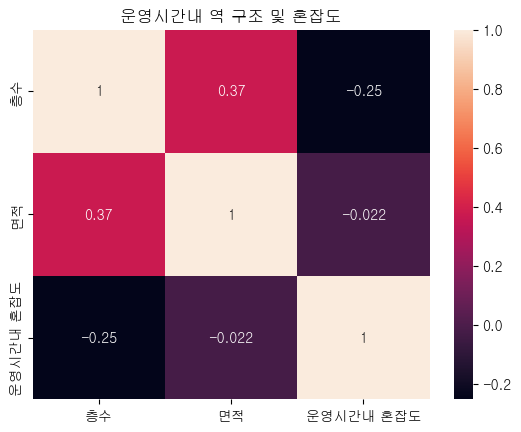

In [98]:
#전체시간대 전체 역 대상으로 한 역 구조 및 혼잡도 상관관계
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('운영시간내 역 구조 및 혼잡도')
sns.heatmap(corr_matrix, annot=True)
plt.show()

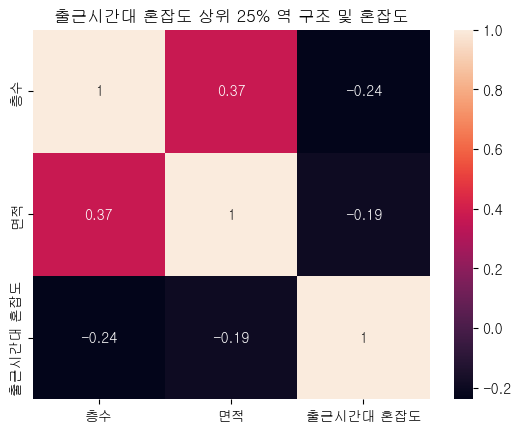

In [99]:
#출근시간대 혼잡도 상위 25% 역 대상으로 한 역 구조 및 혼잡도 상관관계
sns.heatmap(corr_matrix_chulinfra, annot=True)
plt.title('출근시간대 혼잡도 상위 25% 역 구조 및 혼잡도')
plt.show()

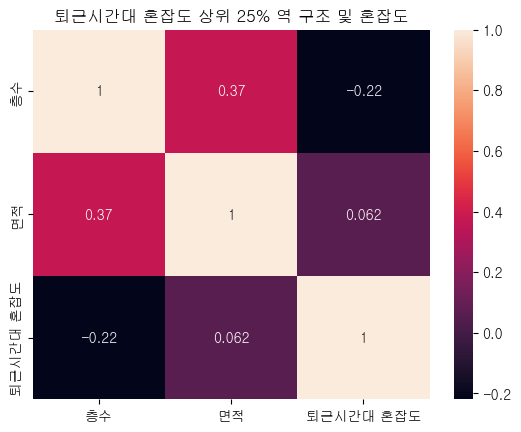

In [100]:
#퇴근시간대 혼잡도 상위 25% 역 대상으로 한 역 구조 및 혼잡도 상관관계
sns.heatmap(corr_matrix_tweinfra, annot=True)
plt.title('퇴근시간대 혼잡도 상위 25% 역 구조 및 혼잡도')
plt.show()

In [102]:
#역별 월별 노인 승하차 인원 데이터
df1=pd.read_csv("./역별 월별 노인 승하차인원_20191231.csv", encoding="cp949")

In [103]:
df1["합계"]=df1.iloc[:,4:].sum(axis=1)

In [104]:
#노인 승하차 2019년 데이터에서 필요한 데이터 부분만 추출 후 승차 집계
newdf1=df1[["역명","구분","합계"]]
newdf1=newdf1[newdf1["구분"]!="하차"]
newdf1.drop(['구분'], axis=1,inplace=True)
newdf1[newdf1.columns[1:]] = newdf1[newdf1.columns[1:]].astype('float')
newdf1

,역명,합계
0,서울역,2091960.0
2,시청,1118281.0
4,종각,1653008.0
6,종로3가,3972545.0
8,종로5가,2926950.0
...,...,...
540,남한산성입구(성남법원.검찰청),769622.0
542,단대오거리,656667.0
544,신흥,424513.0
546,수진,492646.0


In [105]:
df2=pd.read_csv("./역별 월별 노인 승하차인원_20201231.csv", encoding="cp949")

In [106]:
df2["합계"]=df2.iloc[:,4:].sum(axis=1)

In [107]:
df2

,호선,역번호,역명,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
0,1,150,서울역,승차,153893.0,105837.0,87212.0,104040.0,124832.0,121961.0,129661.0,106894.0,105737.0,125898.0,125294.0,100603.0,1391862.0
1,1,150,서울역,하차,149524.0,101892.0,81642.0,97573.0,117595.0,114498.0,122361.0,100768.0,97195.0,118855.0,117950.0,93205.0,1313058.0
2,1,151,시청,승차,87309.0,57500.0,38752.0,41107.0,46882.0,45839.0,52981.0,48655.0,39617.0,46797.0,48758.0,38777.0,592974.0
3,1,151,시청,하차,87943.0,56435.0,37135.0,39686.0,45432.0,44881.0,52425.0,47473.0,37608.0,45391.0,47405.0,36511.0,578325.0
4,1,152,종각,승차,130952.0,88734.0,66790.0,75670.0,89895.0,91863.0,100826.0,88437.0,76070.0,91234.0,89293.0,72533.0,1062297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,8,2825,신흥,하차,37645.0,27990.0,21325.0,24287.0,28308.0,27885.0,28744.0,25724.0,24476.0,27457.0,27161.0,23854.0,324856.0
556,8,2826,수진,승차,41113.0,28561.0,20077.0,23030.0,27076.0,26896.0,30603.0,27470.0,25922.0,30628.0,29565.0,24256.0,335197.0
557,8,2826,수진,하차,41278.0,28407.0,19952.0,22814.0,26528.0,26783.0,30562.0,27265.0,25927.0,30682.0,30165.0,24194.0,334557.0
558,8,2827,모란,승차,45137.0,31291.0,25378.0,32846.0,38287.0,36101.0,37547.0,32183.0,33711.0,38605.0,35390.0,29469.0,415945.0


In [108]:
#노인 승하차 2020년 데이터에서 필요한 데이터 부분만 추출 후 승차 집계
newdf2=no[["역명","구분","합계"]]
newdf2=newdf2[newdf2["구분"]!="하차"]
newdf2.drop(['구분'], axis=1,inplace=True)
newdf2[newdf2.columns[1:]] = newdf2[newdf2.columns[1:]].astype('float')
newdf2

,역명,합계
0,동대문,2910.035821
2,동묘앞,3746.098507
4,서울역,4178.373134
6,시청,1728.638806
8,신설동,2847.970149
...,...,...
552,신흥,833.713433
554,암사,2493.044776
556,잠실(송파구청),1543.146269
558,장지,1745.489552


In [109]:
# df3=pd.read_csv("/content/역별 월별 노인 승하차인원_20211231.csv", encoding="cp949")
# df3

In [110]:
# #노인 승하차 2021년 데이터에서 필요한 데이터 부분만 추출 후 승차 집계
# df3["합계"]=df3.iloc[:,5:].sum(axis=1)

In [111]:
# newdf3=df3[["역명","구분","합계"]]
# newdf3=newdf3[newdf3["구분"]!="하차"]

In [112]:
# newdf3


In [113]:
# newdf3.drop(['구분'], axis=1,inplace=True)
# newdf3[newdf3.columns[1:]] = newdf3[newdf3.columns[1:]].astype('float')
# newdf3

In [114]:
# #노인 승하차 2022년 데이터에서 필요한 데이터 부분만 추출 후 승차 집계
# df4=pd.read_csv("/content/역별 월별 노인 승하차인원_20220831.csv", encoding="cp949")
# df4=df4[df4["승하차구분"]!="하차"]

In [115]:
# df4=df4.groupby(["역명"])[df4.columns[1:]].agg('sum')
# df4.reset_index(inplace=True)
# df4

In [116]:
# df4.drop(['호선'], axis=1,inplace=True)

In [117]:
# df4.drop(['고유역번호(외부역코드)'], axis=1,inplace=True)

In [118]:
# df4[df4.columns[1:]] = df4[df4.columns[1:]].astype('float')
# df4

In [119]:
# df4.columns=["역명","합계"]
# newdf4=df4

In [120]:
newset3=newset2
newset3.drop(["층수"], axis=1,inplace=True)
newset3.drop(["면적"], axis=1,inplace=True)
newset3

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3407091571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset3.drop(["층수"], axis=1,inplace=True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3407091571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newset3.drop(["면적"], axis=1,inplace=True)


,역명,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
0,가락시장,25.4,32.5,23.9
1,가산디지털단지,30.4,47.4,32.8
2,강남,36.5,58.0,45.9
3,강남구청,30.6,46.0,33.7
4,강동,25.2,26.8,22.7
...,...,...,...,...
253,홍제,33.0,37.2,30.1
254,화곡,22.8,22.8,19.9
255,화랑대,8.3,7.0,6.2
256,회현,25.7,43.8,32.3


In [121]:
newset3

,역명,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
0,가락시장,25.4,32.5,23.9
1,가산디지털단지,30.4,47.4,32.8
2,강남,36.5,58.0,45.9
3,강남구청,30.6,46.0,33.7
4,강동,25.2,26.8,22.7
...,...,...,...,...
253,홍제,33.0,37.2,30.1
254,화곡,22.8,22.8,19.9
255,화랑대,8.3,7.0,6.2
256,회현,25.7,43.8,32.3


In [122]:
# #2019년 데이터에서 역별 승차인원 합계
# newdf1=newdf1.reset_index()
# newdf1.drop(["index"], axis=1,inplace=True)
# newdf1.columns=["역명","합계2019"]
# newdf1

In [123]:
# newdf1=newdf1.groupby(["역명"])[newdf1.columns[1:]].agg('sum')
# newdf1.reset_index(inplace=True)

In [124]:
# #2020년 데이터에서 역별 승차인원 합계
# newdf2=newdf2.reset_index()
# newdf2.drop(["index"], axis=1,inplace=True)
# newdf2.columns=["역명","합계2020"]
# newdf2=newdf2.groupby(["역명"])[newdf2.columns[1:]].agg('sum')
# newdf2.reset_index(inplace=True)
# newdf2

In [125]:
# #2021년 데이터에서 역별 승차인원 합계
# newdf3=newdf3.reset_index()
# newdf3.drop(["index"], axis=1,inplace=True)
# newdf3.columns=["역명","합계2021"]
# newdf3=newdf3.groupby(["역명"])[newdf3.columns[1:]].agg('sum')
# newdf3.reset_index(inplace=True)
# newdf3

In [126]:
# #2022년 데이터에서 역별 승차인원 합계
# newdf4=newdf4.reset_index()
# newdf4.drop(["index"], axis=1,inplace=True)
# newdf4.columns=["역명","합계2022"]
# newdf4=newdf4.groupby(["역명"])[newdf4.columns[1:]].agg('sum')
# newdf4.reset_index(inplace=True)
# newdf4

In [127]:
# #2019년 데이터와 2020년 역별 데이터 데이터프레임 합치기
# a=pd.merge(newdf1,newdf2,how="left", left_on="역명", right_on="역명")
# a.dropna(inplace=True)
# a

In [128]:
# #2019년-2020년 및 2021년 역별 데이터 데이터프레임 합치기
# b=pd.merge(a,newdf3,how="left", left_on="역명", right_on="역명")
# b.dropna(inplace=True)
# b

In [129]:
# #2019년-2021년 및 2022년 역별 데이터 데이터프레임 합치기
# c=pd.merge(b,newdf4,how="left", left_on="역명", right_on="역명")
# c.dropna(inplace=True)

In [130]:
# c

In [131]:
# #2019-2022년 노인 승하차인원 합계
# c["노인 승하차 인원(2019-2022)"]=c.iloc[:,1:].sum(axis=1)

In [132]:
# #2019-2022년 노인 승하차인원 합친 데이터프레임
# nointotal=c[["역명","노인 승하차 인원(2019-2022)"]]
# nointotal

In [133]:
newdf2

,역명,합계
0,동대문,2910.035821
2,동묘앞,3746.098507
4,서울역,4178.373134
6,시청,1728.638806
8,신설동,2847.970149
...,...,...
552,신흥,833.713433
554,암사,2493.044776
556,잠실(송파구청),1543.146269
558,장지,1745.489552


In [134]:
newset3

,역명,출근시간대 혼잡도,퇴근시간대 혼잡도,운영시간내 혼잡도
0,가락시장,25.4,32.5,23.9
1,가산디지털단지,30.4,47.4,32.8
2,강남,36.5,58.0,45.9
3,강남구청,30.6,46.0,33.7
4,강동,25.2,26.8,22.7
...,...,...,...,...
253,홍제,33.0,37.2,30.1
254,화곡,22.8,22.8,19.9
255,화랑대,8.3,7.0,6.2
256,회현,25.7,43.8,32.3


In [135]:
#역별 노인승하차인원, 운영시간내 혼잡도, 출근시간대 혼잡도, 퇴근시간대 혼잡도 데이터 프레임
finalcrr=pd.merge(newdf2,newset3,how="left", left_on="역명", right_on="역명")
finalcrr.dropna(inplace=True)
finalcrr.columns=["역명","노인승하차인원","운영시간내 혼잡도","출근시간대 혼잡도", "퇴근시간대 혼잡도"]


In [136]:
finalcrr=pd.merge(newdf2,newset3,how="left", left_on="역명", right_on="역명")
finalcrr.dropna(inplace=True)
finalcrr.columns=["역명","노인승하차인원","운영시간내 혼잡도","출근시간대 혼잡도", "퇴근시간대 혼잡도"]

In [137]:
finalcrr

,역명,노인승하차인원,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,동대문,2910.035821,34.4,47.4,37.4
1,동묘앞,3746.098507,24.2,34.3,26.3
3,시청,1728.638806,23.1,39.9,30.1
4,신설동,2847.970149,13.9,17.5,14.5
5,제기동,6937.755224,20.1,27.4,22.2
...,...,...,...,...,...
274,송파,1308.883582,44.2,56.7,41.2
275,수진,994.976119,8.0,8.4,7.4
276,신흥,833.713433,9.0,9.1,8.0
277,암사,2493.044776,9.6,4.0,5.3


In [138]:
finalcrr=pd.merge(no_chul, finalcrr, how="left", left_on="역명", right_on="역명")
finalcrr.dropna(inplace=True)
finalcrr.columns=["역명","출근시간대 노인승하차인원","노인승하차인원","운영시간내 혼잡도","출근시간대 혼잡도", "퇴근시간대 혼잡도"]

In [139]:
finalcrr

,역명,출근시간대 노인승하차인원,노인승하차인원,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,동대문,317.976119,2910.035821,34.4,47.4,37.4
1,동대문,317.976119,3600.730539,34.4,47.4,37.4
2,동묘앞,156.271642,3746.098507,24.2,34.3,26.3
3,동묘앞,156.271642,1606.113433,24.2,34.3,26.3
5,시청,96.134328,1728.638806,23.1,39.9,30.1
...,...,...,...,...,...,...
322,송파,286.256716,1308.883582,44.2,56.7,41.2
323,수진,189.065672,994.976119,8.0,8.4,7.4
324,신흥,157.447761,833.713433,9.0,9.1,8.0
325,암사,584.071642,2493.044776,9.6,4.0,5.3


In [140]:
finalcrr=pd.merge(no_twe, finalcrr, how="left", left_on="역명", right_on="역명")
finalcrr.dropna(inplace=True)
finalcrr.columns=["역명","퇴근시간대 노인승하차인원","출근시간대 노인승하차인원","노인승하차인원","운영시간내 혼잡도","출근시간대 혼잡도", "퇴근시간대 혼잡도"]

In [141]:
finalcrr

,역명,퇴근시간대 노인승하차인원,출근시간대 노인승하차인원,노인승하차인원,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도
0,동대문,445.113433,317.976119,2910.035821,34.4,47.4,37.4
1,동대문,445.113433,317.976119,3600.730539,34.4,47.4,37.4
2,동대문,445.113433,246.053892,2910.035821,34.4,47.4,37.4
3,동대문,445.113433,246.053892,3600.730539,34.4,47.4,37.4
4,동묘앞,649.370149,156.271642,3746.098507,24.2,34.3,26.3
...,...,...,...,...,...,...,...
424,송파,148.892537,286.256716,1308.883582,44.2,56.7,41.2
425,수진,123.000000,189.065672,994.976119,8.0,8.4,7.4
426,신흥,108.886567,157.447761,833.713433,9.0,9.1,8.0
427,암사,263.602985,584.071642,2493.044776,9.6,4.0,5.3


In [142]:
#출근 혼잡도 대비 노인승하차, 퇴근 혼잡도 대비 노인승하차 구하기
finalcrrhonjapdo=finalcrr
finalcrrhonjapdo["출근 혼잡도 대비 노인승하차"]=(finalcrrhonjapdo["출근시간대 노인승하차인원"]/finalcrrhonjapdo["출근시간대 혼잡도"]/1000).round(1)
finalcrrhonjapdo["퇴근 혼잡도 대비 노인승하차"]=(finalcrrhonjapdo["퇴근시간대 노인승하차인원"]/finalcrrhonjapdo["퇴근시간대 혼잡도"]/1000).round(1)

In [143]:
#운영시간내 혼잡도 상위 25%의 혼잡도 임계치
finalcrrhonjapdo["운영시간내 혼잡도"].quantile(q=0.75)

30.6

In [144]:
#출근시간대 혼잡한 상위 25% 역
chul=finalcrrhonjapdo[finalcrrhonjapdo["출근시간대 혼잡도"]>finalcrrhonjapdo["출근시간대 혼잡도"].quantile(q=0.75)]
chul=chul.sort_values("출근시간대 혼잡도", ascending=False)
chulbar=chul

In [145]:
#퇴근시간대 혼잡한 상위 25% 역
twe=finalcrrhonjapdo[finalcrrhonjapdo["퇴근시간대 혼잡도"]>finalcrrhonjapdo["퇴근시간대 혼잡도"].quantile(q=0.75)]
twe=twe.sort_values("퇴근시간대 혼잡도", ascending=False)
twebar=twe

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, '남태령'),
  Text(1, 0, '서초'),
  Text(2, 0, '혜화'),
  Text(3, 0, '방배'),
  Text(4, 0, '강남'),
  Text(5, 0, '석촌'),
  Text(6, 0, '송파'),
  Text(7, 0, '역삼'),
  Text(8, 0, '압구정'),
  Text(9, 0, '신사'),
  Text(10, 0, '잠원'),
  Text(11, 0, '고속터미널'),
  Text(12, 0, '문정'),
  Text(13, 0, '옥수'),
  Text(14, 0, '안국'),
  Text(15, 0, '중곡'),
  Text(16, 0, '선릉'),
  Text(17, 0, '금호'),
  Text(18, 0, '문래'),
  Text(19, 0, '당산'),
  Text(20, 0, '구로디지털단지'),
  Text(21, 0, '봉천'),
  Text(22, 0, '까치울'),
  Text(23, 0, '동대문'),
  Text(24, 0, '가산디지털단지'),
  Text(25, 0, '내방'),
  Text(26, 0, '청담'),
  Text(27, 0, '사당'),
  Text(28, 0, '부천종합운동장'),
  Text(29, 0, '강남구청'),
  Text(30, 0, '사가정'),
  Text(31, 0, '충무로'),
  Text(32, 0, '학동'),


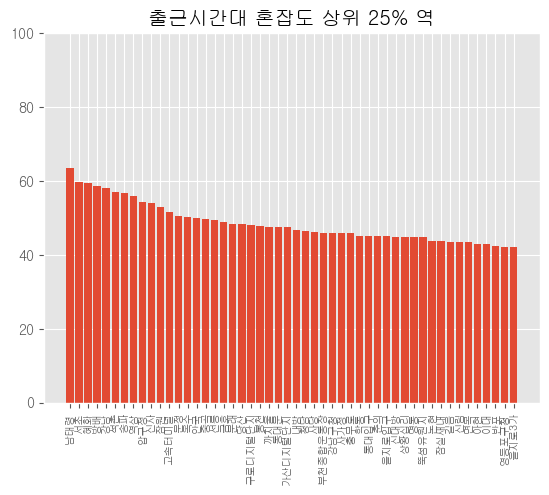

In [146]:
#출근시간대 혼잡한 상위 25% 역 시각화
plt.style.use('ggplot')
plt.title('출근시간대 혼잡도 상위 25% 역')
plt.ylim([0, 100])
plt.bar(x=chulbar["역명"], height=chulbar["출근시간대 혼잡도"])
plt.xticks(rotation=90, fontsize=7.5)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, '서초'),
  Text(1, 0, '방배'),
  Text(2, 0, '남태령'),
  Text(3, 0, '강남'),
  Text(4, 0, '혜화'),
  Text(5, 0, '역삼'),
  Text(6, 0, '송파'),
  Text(7, 0, '석촌'),
  Text(8, 0, '중곡'),
  Text(9, 0, '봉천'),
  Text(10, 0, '구로디지털단지'),
  Text(11, 0, '문래'),
  Text(12, 0, '신림'),
  Text(13, 0, '당산'),
  Text(14, 0, '잠원'),
  Text(15, 0, '압구정'),
  Text(16, 0, '신사'),
  Text(17, 0, '신대방'),
  Text(18, 0, '사당'),
  Text(19, 0, '사가정'),
  Text(20, 0, '고속터미널'),
  Text(21, 0, '옥수'),
  Text(22, 0, '동대문'),
  Text(23, 0, '안국'),
  Text(24, 0, '선릉'),
  Text(25, 0, '길음'),
  Text(26, 0, '금호'),
  Text(27, 0, '내방'),
  Text(28, 0, '면목'),
  Text(29, 0, '까치울'),
  Text(30, 0, '상왕십리'),
  Text(31, 0, '문정'),
  Text(32, 0,

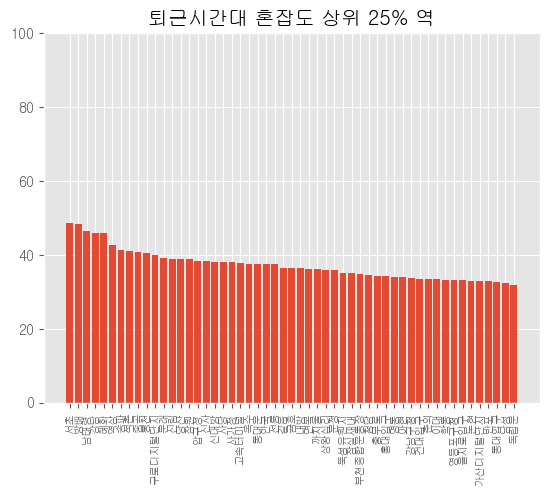

In [147]:
#퇴근시간대 혼잡한 상위 25% 역 시각화
plt.style.use('ggplot')
plt.title('퇴근시간대 혼잡도 상위 25% 역')
plt.ylim([0, 100])
plt.bar(x=twebar["역명"], height=twebar["퇴근시간대 혼잡도"])
plt.xticks(rotation=90, fontsize=7.5)

In [148]:
finalcrrhonjapdo

,역명,퇴근시간대 노인승하차인원,출근시간대 노인승하차인원,노인승하차인원,운영시간내 혼잡도,출근시간대 혼잡도,퇴근시간대 혼잡도,출근 혼잡도 대비 노인승하차,퇴근 혼잡도 대비 노인승하차
0,동대문,445.113433,317.976119,2910.035821,34.4,47.4,37.4,0.0,0.0
1,동대문,445.113433,317.976119,3600.730539,34.4,47.4,37.4,0.0,0.0
2,동대문,445.113433,246.053892,2910.035821,34.4,47.4,37.4,0.0,0.0
3,동대문,445.113433,246.053892,3600.730539,34.4,47.4,37.4,0.0,0.0
4,동묘앞,649.370149,156.271642,3746.098507,24.2,34.3,26.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...
424,송파,148.892537,286.256716,1308.883582,44.2,56.7,41.2,0.0,0.0
425,수진,123.000000,189.065672,994.976119,8.0,8.4,7.4,0.0,0.0
426,신흥,108.886567,157.447761,833.713433,9.0,9.1,8.0,0.0,0.0
427,암사,263.602985,584.071642,2493.044776,9.6,4.0,5.3,0.1,0.0


In [149]:
cor_general=finalcrrhonjapdo[["역명","노인승하차인원","운영시간내 혼잡도"]]

In [150]:
cor_chul=finalcrrhonjapdo[["역명","출근시간대 노인승하차인원","출근시간대 혼잡도"]]

In [151]:
cor_twe=finalcrrhonjapdo[["역명","퇴근시간대 노인승하차인원","퇴근시간대 혼잡도"]]

In [152]:
#노인승하차인원, 운영시간내혼잡도, 출근시간대혼잡도, 퇴근시간대혼잡도, 출근혼잡도대비 노인승차라, 퇴근혼잡도대비 노인승하차 상관관계
corr_matrix2=cor_general.corr()
corr_matrix2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3856195907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2=cor_general.corr()


,노인승하차인원,운영시간내 혼잡도
노인승하차인원,1.000000,0.203003
운영시간내 혼잡도,0.203003,1.000000


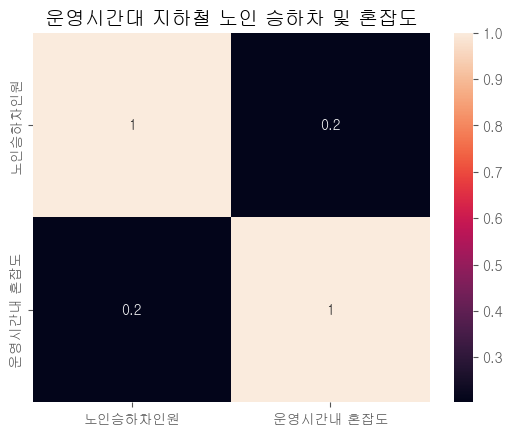

In [153]:
#노인승하차인원, 운영시간내혼잡도, 출근시간대혼잡도, 퇴근시간대혼잡도, 출근혼잡도대비 노인승차라, 퇴근혼잡도대비 노인승하차 상관관계 시각화 (전체시간대)
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('운영시간대 지하철 노인 승하차 및 혼잡도')
sns.heatmap(corr_matrix2, annot=True)
plt.show()

In [154]:
corr_chul=cor_chul.corr()
corr_twe=cor_twe.corr()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3367066722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_chul=cor_chul.corr()
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\3367066722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_twe=cor_twe.corr()


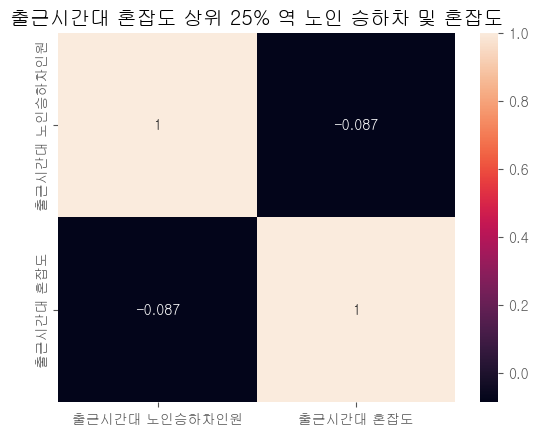

In [155]:
#노인승하차인원, 운영시간내혼잡도, 출근시간대혼잡도, 퇴근시간대혼잡도, 출근혼잡도대비 노인승차라, 퇴근혼잡도대비 노인승하차 상관관계 시각화 (출근시간대 혼잡도 상위 25%역)
plt.title('출근시간대 혼잡도 상위 25% 역 노인 승하차 및 혼잡도')
sns.heatmap(corr_chul, annot=True)
plt.show()

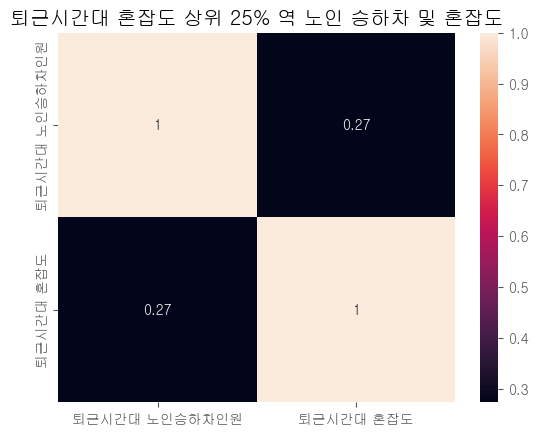

In [156]:
#노인승하차인원, 운영시간내혼잡도, 출근시간대혼잡도, 퇴근시간대혼잡도, 출근혼잡도대비 노인승차라, 퇴근혼잡도대비 노인승하차 상관관계 시각화 (퇴근시간대 혼잡도 상위 25%역)
plt.title('퇴근시간대 혼잡도 상위 25% 역 노인 승하차 및 혼잡도')
sns.heatmap(corr_twe, annot=True)
plt.show()

In [158]:
#연령별 인구구성 통계
prop=pd.read_csv("./주요_연령계층별_추계인구_생산연령인구__고령인구_등____전국_20230221104849.csv", encoding="cp949")
prop

,가정별,인구종류별,2020,2021,2022,2023,2024,2025,2026,2027,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),생산연령인구(천명): 계(15~64세),37379.0,37030.0,36675.0,36372.0,36029.0,35610.0,35180.0,34867.0,...,20250.0,19855.0,19472.0,19116.0,18746.0,18392.0,18113.0,17862.0,17604.0,17368.0
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),생산연령인구(천명): 15-24세,5911.0,5625.0,5378.0,5196.0,5029.0,4855.0,4742.0,4703.0,...,2986.0,2939.0,2895.0,2851.0,2806.0,2758.0,2705.0,2646.0,2581.0,2511.0
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),생산연령인구(천명): 25-49세,19078.0,18806.0,18565.0,18346.0,18122.0,17978.0,17849.0,17650.0,...,8993.0,8838.0,8683.0,8549.0,8400.0,8258.0,8156.0,8089.0,8047.0,8030.0
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),생산연령인구(천명): 50-64세,12390.0,12599.0,12732.0,12830.0,12878.0,12776.0,12589.0,12514.0,...,8270.0,8078.0,7893.0,7716.0,7540.0,7376.0,7253.0,7128.0,6976.0,6826.0
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),- 구성비(%): 15-24세,11.4,10.9,10.4,10.1,9.8,9.4,9.2,9.2,...,7.1,7.1,7.0,7.0,7.0,7.0,6.9,6.9,6.8,6.7
5,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),- 구성비(%): 25-49세,36.8,36.3,36.0,35.6,35.2,34.9,34.7,34.4,...,21.4,21.3,21.1,21.1,21.0,20.9,20.9,21.0,21.1,21.3
6,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),- 구성비(%): 50-64세,23.9,24.3,24.7,24.9,25.0,24.8,24.5,24.4,...,19.6,19.4,19.2,19.0,18.8,18.6,18.6,18.5,18.3,18.1
7,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),고령인구(천명): 65세+,8152.0,8571.0,9018.0,9500.0,10008.0,10585.0,11197.0,11670.0,...,18662.0,18622.0,18567.0,18480.0,18402.0,18303.0,18123.0,17912.0,17704.0,17473.0
8,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),고령인구(천명): 65-69세,2662.0,2896.0,3063.0,3274.0,3507.0,3685.0,3933.0,4017.0,...,3548.0,3520.0,3468.0,3395.0,3335.0,3248.0,3098.0,2927.0,2789.0,2614.0
9,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제순이동-중위),고령인구(천명): 70세+,5490.0,5676.0,5955.0,6226.0,6501.0,6900.0,7264.0,7653.0,...,15114.0,15102.0,15099.0,15085.0,15067.0,15055.0,15026.0,14985.0,14915.0,14858.0


In [159]:
#연령별 인구구성에서 고령인구 추출
prop_num=prop.iloc[:,1:5][8:13]
prop_num

,인구종류별,2020,2021,2022
8,고령인구(천명): 65-69세,2662.0,2896.0,3063.0
9,고령인구(천명): 70세+,5490.0,5676.0,5955.0
10,고령인구(천명): 75세+,3499.0,3585.0,3787.0
11,고령인구(천명): 80세+,1891.0,2017.0,2186.0
12,고령인구(천명): 85세+,782.0,859.0,939.0


In [160]:
#연령별 인구구성에서 고령인구 합산 (2020-2022)
prop_num["합계"]=prop_num.sum(axis=1)
prop_num.drop(['2020', '2021','2022'], axis=1, inplace=True)
prop_num

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_15056\1607431711.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_num["합계"]=prop_num.sum(axis=1)


,인구종류별,합계
8,고령인구(천명): 65-69세,8621.0
9,고령인구(천명): 70세+,17121.0
10,고령인구(천명): 75세+,10871.0
11,고령인구(천명): 80세+,6094.0
12,고령인구(천명): 85세+,2580.0


In [161]:
#고령인구 비율 계산
prop_num_pro=prop_num
prop_num_pro["비율"]=(prop_num_pro["합계"]/prop_num_pro["합계"].sum(axis=0)*100).round(1)
prop_num_pro

,인구종류별,합계,비율
8,고령인구(천명): 65-69세,8621.0,19.0
9,고령인구(천명): 70세+,17121.0,37.8
10,고령인구(천명): 75세+,10871.0,24.0
11,고령인구(천명): 80세+,6094.0,13.5
12,고령인구(천명): 85세+,2580.0,5.7


In [171]:
#연령대별 인구 합계 리스트로 추출
age65_70=prop_num[0:1]["합계"].to_list()

age70=prop_num[1:2]["합계"].to_list()
array70=np.array(age70)

age75=prop_num[2:3]["합계"].to_list()
array75=np.array(age75)

age70_75=np.subtract(age70,age75)
list(age70_75)

age80=prop_num[3:4]["합계"].to_list()
array80=np.array(age80)

age75_80=np.subtract(age75,age80)
list(age75_80)

age85=prop_num[4:5]["합계"].to_list()
array85=np.array(age85)

age80_85=np.subtract(age80,age85)
list(age80_85)

[3514.0]

In [176]:
#연령대별 인구 합계 데이터프레임화
prop_num65_70=pd.DataFrame({"인구종류별": ["65-69세"], "합계": age65_70})
prop_num65_70

prop_num70_75 = pd.DataFrame({"인구종류별": ["70-74세"], "합계": list(age70_75)})
prop_num70_75

prop_num75_80 = pd.DataFrame({"인구종류별": ["75-79세"], "합계": list(age75_80)})
prop_num75_80

prop_num80_85 = pd.DataFrame({"인구종류별": ["80-84세"], "합계": list(age80_85)})
prop_num80_85

prop_num85_=pd.DataFrame({"인구종류별": ["85+세"], "합계": age85})
prop_num85_

popu1=pd.concat([prop_num65_70, prop_num70_75,prop_num75_80,prop_num80_85,prop_num85_], join="inner")
popu1

,인구종류별,합계
0,65-69세,8621.0
0,70-74세,6250.0
0,75-79세,4777.0
0,80-84세,3514.0
0,85+세,2580.0


In [177]:
#65-85세 이상 인구 비율 열 추가
popu1["비율"]=(popu1["합계"]/popu1["합계"].sum(axis=0)*100).round(1)

In [178]:
#65-85세 이상 인구 합계 및 비율 데이터프레임
popu1

,인구종류별,합계,비율
0,65-69세,8621.0,33.5
0,70-74세,6250.0,24.3
0,75-79세,4777.0,18.6
0,80-84세,3514.0,13.7
0,85+세,2580.0,10.0


c:\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


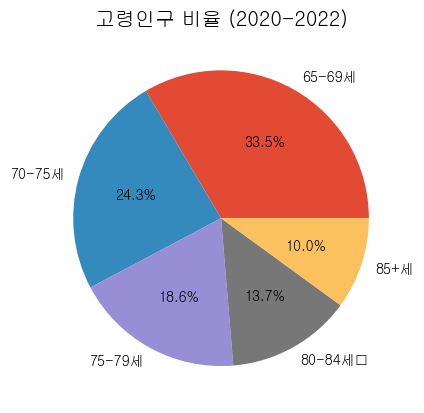

In [179]:
#고령인구 비율 시각화
plt.style.use('ggplot')
listforpie=popu1["합계"].tolist()
y = np.array(listforpie)

mylabels = ["65-69세","70-75세", "75-79세", "80-84세	", "85+세" ]
plt.title('고령인구 비율 (2020-2022)')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 